<a href="https://colab.research.google.com/github/Shruthi-Selvakumar/Varna/blob/main/objectrecog1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.models import load_model
from keras.models import model_from_json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img=image.load_img("/content/drive/MyDrive/object detect/test/pen/1.jpg")

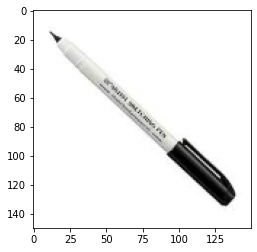

In [ ]:
plt.imshow(img)

In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/object detect/train/',target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True)
test_dataset=test.flow_from_directory('/content/drive/MyDrive/object detect/test/',target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True)


Found 1208 images belonging to 18 classes.
Found 302 images belonging to 17 classes.


In [ ]:
train_dataset.class_indices

{'.ipynb_checkpoints': 0,
 'book 1': 1,
 'decoritems': 2,
 'fan': 3,
 'flowers': 4,
 'lights': 5,
 'mobile': 6,
 'newspaper': 7,
 'pen': 8,
 'sofa': 9,
 'sofacusions': 10,
 'table': 11,
 'telephone': 12,
 'tvdecor': 13,
 'tvremote': 14,
 'tvsetupbox': 15,
 'vase': 16,
 'wall decor': 17}

In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
nb_values=17
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# 3rd Convolution layer
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# 4th Convolution layer
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(64))
model.add(Activation('relu'))


# Fully connected layer 2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(nb_values, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_fit=model.fit(train_dataset,steps_per_epoch=20,epochs=100,validation_data=test_dataset)
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
                        

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Loaded model from disk


In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(train_dataset, test_dataset, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
dir_path="/content/drive/MyDrive/test1"
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i,target_size=(150,150,3))
  img = image.img_to_array(img)
  img = img/255
  plt.imshow(img)
  classes =['book',
  'decoritems',
  'fan',
  'flowers',
  'lights',
  'mobile',
  'newspaper',
  'pen',
  'sofa',
  'sofacusions',
  'table',
  'telephone',
  'tvdecor',
  'tvremote',
  'tvsetupbox',
  'vase',
  'wall decor']
  proba = model.predict(img.reshape(1,150,150,3))
  top_3 = np.argsort(proba[0])[:-4:-1]
  for i in range(3):
      print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
  

  

In [ ]:

 
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
 
 
 

NameError: ignored

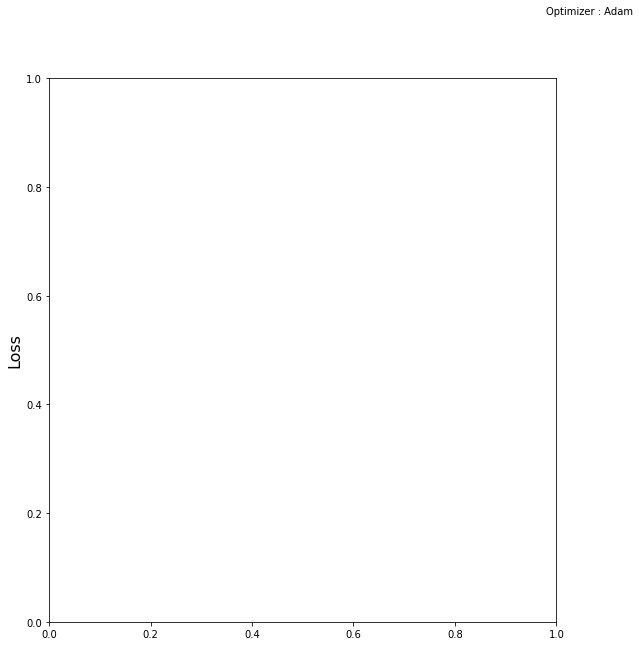

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.model_fit['loss'], label='Training Loss')
plt.plot(history.model_fit['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.model_fit['acc'], label='Training Accuracy')
plt.plot(history.model_fit['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

sofa (1.0)
sofacusions (0.996)
fan (0.989)


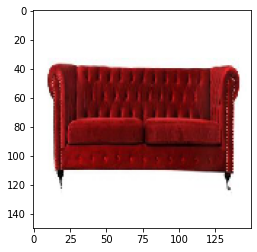

In [ ]:
img = image.load_img('/content/drive/MyDrive/test1/151.jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

pen (1.0)
fan (0.993)
lights (0.991)


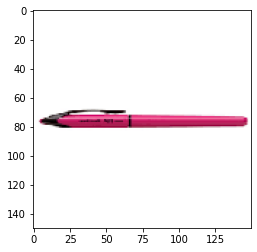

In [ ]:


img = image.load_img('/content/drive/MyDrive/test1/17.png',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)



pen (1.0)
fan (0.997)
tvremote (0.964)


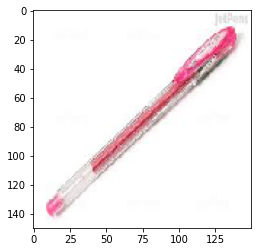

In [ ]:
img = image.load_img('/content/drive/MyDrive/test1/18.jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

sofacusions (0.968)
tvdecor (0.939)
vase (0.936)


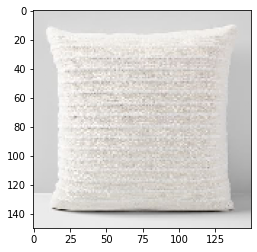

In [ ]:
img = image.load_img('/content/68 (20).jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

tvdecor (0.995)
sofacusions (0.975)
decoritems (0.973)


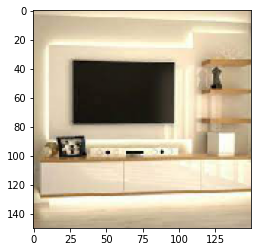

In [ ]:
img = image.load_img('/content/download (2).jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

fan (0.97)
book (0.956)
newspaper (0.91)


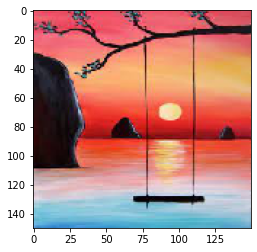

In [ ]:
img = image.load_img('/content/download.jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

lights (0.995)
sofacusions (0.94)
wall decor (0.897)


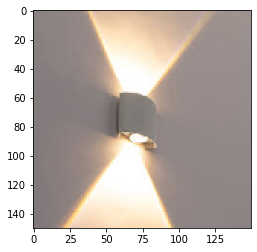

In [ ]:
img = image.load_img('/content/download (1).jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

tvremote (0.999)
vase (0.995)
mobile (0.992)


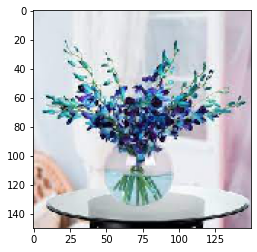

In [ ]:
img = image.load_img('/content/download (3).jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

wall decor (1.0)
vase (1.0)
lights (1.0)


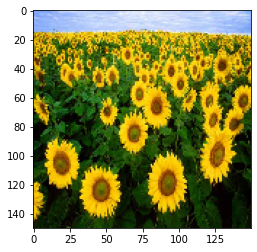

In [ ]:
img = image.load_img('/content/Sunflower-field-Fargo-North-Dakota.jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

sofa (1.0)
decoritems (0.994)
sofacusions (0.99)


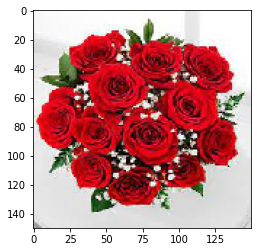

In [ ]:
img = image.load_img('/content/download (4).jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

book (1.0)
telephone (0.998)
flowers (0.998)


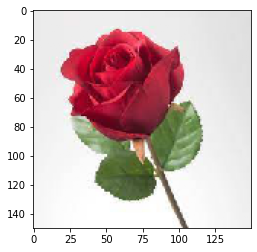

In [ ]:
img = image.load_img('/content/download (5).jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

tvremote (1.0)
vase (1.0)
flowers (0.996)


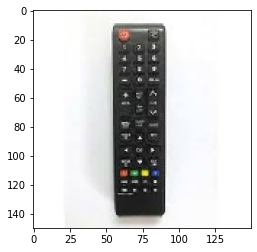

In [ ]:
img = image.load_img('/content/download (7).jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
classes =['book',
 'decoritems',
 'fan',
 'flowers',
 'lights',
 'mobile',
 'newspaper',
 'pen',
 'sofa',
 'sofacusions',
 'table',
 'telephone',
 'tvdecor',
 'tvremote',
 'tvsetupbox',
 'vase',
 'wall decor']
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)